<ipython-input-1-b65a2711937e>:19: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(


   year countrycode       rgdpna      rkna        pop        emp          avh  \
0  1995         GBR  1840006.125  0.582493  57.932453  25.669792  1722.625249   
1  1996         GBR  1885852.000  0.604429  58.113557  25.924555  1722.092499   
2  1997         GBR  1979678.625  0.622077  58.307313  26.408014  1721.195442   
3  1998         GBR  2053080.625  0.644714  58.509974  26.690899  1716.999440   
4  1999         GBR  2120733.500  0.666232  58.715854  27.067028  1708.610393   
5  2000         GBR  2195091.250  0.689696  58.923309  27.380348  1692.953954   
6  2001         GBR  2255024.500  0.711957  59.124288  27.595715  1695.976472   
7  2002         GBR  2304155.750  0.732548  59.326294  27.803614  1678.561396   
8  2003         GBR  2380697.250  0.751657  59.561432  28.060053  1669.380343   
9  2004         GBR  2435126.500  0.769363  59.872753  28.353535  1666.715738   

      labsh    rtfpna     alpha           y_n         hours  tfp_term  \
0  0.544222  0.939039  0.455778  71

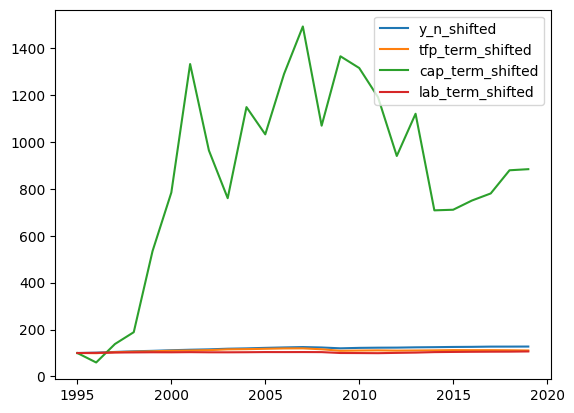

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Load data\\drive\\1-b6R0mMIboYtMKyuC_1Hy-00ke3pVV9T
pwt10 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')

# Filter and select relevant columns
data = pwt10.loc[pwt10['country'].isin(['United Kingdom'])][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data = data.loc[(data['year'] >= 1995) & (data['year'] <= 2019)].dropna()

# Calculate additional variables
data['alpha'] = 1 - data['labsh']
data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
data['hours'] = data['emp'] * data['avh']  # L
data['tfp_term'] = data['rtfpna'] ** (1 / (1 - data['alpha']))  # A^(1/(1-alpha))
data['cap_term'] = (data['rkna'] / data['rgdpna']) ** (data['alpha'] / (1 - data['alpha']))  # (K/Y)^(alpha/(1-alpha))
data['lab_term'] = data['hours'] / data['pop']  # L/N
data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(
    alpha=1 - x['labsh'],
    y_n_shifted=100 * x['y_n'] / x['y_n'].iloc[0],
    tfp_term_shifted=100 * x['tfp_term'] / x['tfp_term'].iloc[0],
    cap_term_shifted=100 * x['cap_term'] / x['cap_term'].iloc[0],
    lab_term_shifted=100 * x['lab_term'] / x['lab_term'].iloc[0]
)).reset_index(drop=True).dropna()

# Print first 10 rows of data
print(data.head(10))

# Plot data
plt.plot(data['year'], data['y_n_shifted'], label='y_n_shifted')
plt.plot(data['year'], data['tfp_term_shifted'], label='tfp_term_shifted')
plt.plot(data['year'], data['cap_term_shifted'], label='cap_term_shifted')
plt.plot(data['year'], data['lab_term_shifted'], label='lab_term_shifted')
plt.legend()
plt.show()
